In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
from typing import Dict
from jina import Document, DocumentArray, Flow, Executor, requests
import matplotlib.pyplot as plt 
import cv2
import numpy as np 
import tensorflow as tf
import os


class ImageResizer(Executor):
    @requests
    def resize(self, docs : DocumentArray, parameters : Dict, **kargs):
        resize_docs = DocumentArray()
        for doc in docs:
            doc = np.array(doc.blob)
            resize_blob = doc.resize((256, 256, 3))
            resize_blob.reshape(-1, 256, 256, 3)
            print(resize_blob)
            new_doc = Document(blob = resize_blob, tags = doc.tags)
            resize_blob.append(new_doc)

        return resize_docs

class ImageNormalizer(Executor):
    @requests
    def normalize(self, docs : DocumentArray, parameters : Dict, **kargs):
        norm_docs = DocumentArray()
        for doc in docs:
            img_blob = np.array(doc.blob)
            img_blob = img_blob / 255
            print(img_blob)
            new_doc = Document(blob = img_blob, tags = doc.tags)
            norm_docs.append(new_doc)

        return norm_docs

def Loadmodel():
    model_exp = tf.keras.models.load_model('model_dnet121.h5')
    return model_exp

class Classify(Executor):
    @requests
    def predict(self, docs : DocumentArray, parameters : Dict, **kwargs):
        X = np.array([
            i.blob for i in docs
        ])
        model_exp = Loadmodel()
        prediction = (model_exp.predict(X) > 0.41).astype(int)
        prediction = prediction.reshape(1, -1)[0]
        print(prediction)

        return None

2021-11-05 15:59:49.691841: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jaabir/anaconda3/envs/jina/lib/python3.9/site-packages/cv2/../../lib64:
2021-11-05 15:59:49.691897: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
flow = (
    Flow(cors = True, protocol = 'http', install_requirements=True, port_expose = 12344)
    .add(
        name = 'image_resizing',
        uses = ImageResizer,
    )
    .add(
        name = 'image_normalizer',
        uses =ImageNormalizer,
    )
    .add(
        name = 'fire_detector',
        uses = Classify
    )
)

In [27]:
doc = Document(uri = 'images/ff.jpg')
doc.convert_uri_to_image_blob()
testing = DocumentArray([doc])

In [29]:
pd.options.display.max_rows = None

(-0.5, 1099.5, 575.5, -0.5)

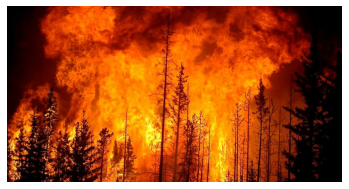

In [45]:
plt.imshow(doc.blob)
plt.axis('off')

In [41]:
doc.blob.shape

(576, 1100, 3)

In [47]:
test = np.resize(doc.blob, (500, 900, 3))
test.shape

(500, 900, 3)

In [48]:
type(doc.blob)

numpy.ndarray

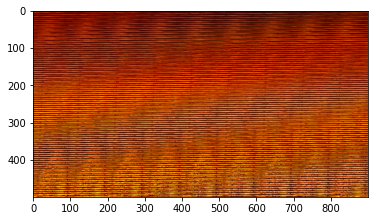

In [49]:
plt.imshow(test)

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as imggg

In [53]:
gen = imggg(
    rescale = 1 / 255
)

In [66]:
resized = gen.flow_from_directory('images', target_size= (256, 256), save_to_dir = 'resized/' ,color_mode = 'rgb')
resized

Found 1 images belonging to 1 classes.


In [65]:
resized

In [68]:
model = Loadmodel()
model

2021-11-05 16:29:27.479795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jaabir/anaconda3/envs/jina/lib/python3.9/site-packages/cv2/../../lib64:
2021-11-05 16:29:27.479824: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-05 16:29:27.479844: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jaabir): /proc/driver/nvidia/version does not exist
2021-11-05 16:29:27.480021: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


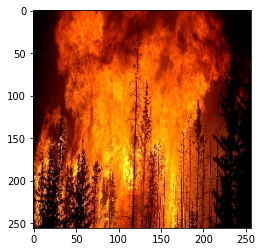

In [81]:
plt.imshow(T2)

In [79]:
import cv2

T2 = cv2.resize(doc.blob, dsize = (256, 256), interpolation= cv2.INTER_CUBIC)

In [71]:
test = np.resize(doc.blob, (256, 256, 3))

In [75]:
test.shape

(256, 256, 3)

In [80]:
T2.shape

(256, 256, 3)

In [83]:
q = T2.reshape(-1, 256, 256, 3)
q.shape

(1, 256, 256, 3)

In [86]:
(model.predict(q) > 0.41).astype(int)[0]

array([1])